In [5]:
from Bio.PDB import PDBParser, PDBIO, Select

class ChainResidueSelect(Select):
    """Keep only residues between start–end on a given chain."""
    def __init__(self, chain_id, start, end):
        self.chain_id = chain_id
        self.start = start
        self.end = end

    def accept_chain(self, chain):
        return (chain.id == self.chain_id)

    def accept_residue(self, residue):
        resnum = residue.id[1]
        return (self.start <= resnum <= self.end)

# parameters
INPUT_PDB  = "full-structures/Omicron-BA.2.12.1-7XNS.pdb"
OUTPUT_PDB = "rbd-structures/Omicron-BA.2.12.1-rbd.pdb"
START, END = 319, 541
CHAIN_ID   = "B"

# parse + write
parser    = PDBParser(QUIET=True)
structure = parser.get_structure("X", INPUT_PDB)

io = PDBIO()
io.set_structure(structure)
selector = ChainResidueSelect(CHAIN_ID, START, END)
io.save(OUTPUT_PDB, select=selector)

print(f"Wrote chain {CHAIN_ID}, residues {START}–{END} to {OUTPUT_PDB}")


Wrote chain B, residues 319–541 to rbd-structures/Omicron-BA.2.12.1-rbd.pdb


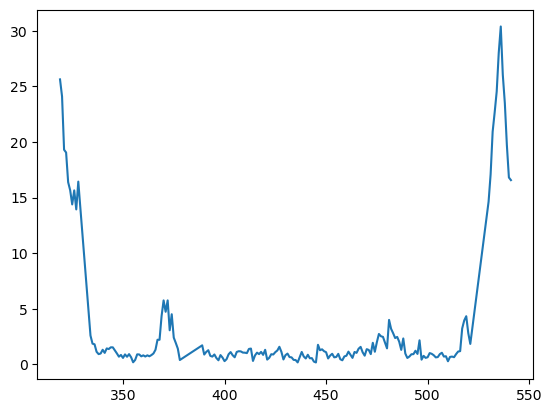

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("wuhan_delta_distances.csv")
plt.plot(data["residue_number"], data["ca_distance"])
plt.show()